In [3]:
import pandas as pd
from pycaret.classification import*
# Load the data from the uploaded Excel file
file_path = r'D:\NTU\DA_BO\BaiTap_Lon\challenge_10\north-america-retail-supply-chain-sales-analysis-A3Qaz4X8pQfxMkkO.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset and the columns to understand its structure
#data.head(), data['Returned'].unique()

In [4]:
# Chuyển đổi cột 'Returned' sang định dạng nhị phân trong đó 'Không' là 0 và bất kỳ giá trị nào khác là 1
data['Returned'] = (data['Returned'] != 'Not').astype(int)

# Check the transformation and show the distribution of the 'Returned' column
#data['Returned'].value_counts(), data.head()


In [5]:
# Chọn các thuộc tính cho mô hình
features = data.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'])

# Hiển thị các cột còn lại để xác định kiểu dữ liệu
features.dtypes


Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Segment                        object
Country                        object
City                           object
State                          object
Region                         object
Retail Sales People            object
Category                       object
Sub-Category                   object
Returned                        int32
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
dtype: object

In [6]:
# from pycaret.classification import setup, compare_models

# Thiết lập môi trường PyCaret
clf_setup = setup(data=features,
                  target='Returned',
                  numeric_features=['Sales', 'Quantity', 'Discount', 'Profit'],
                  categorical_features=['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category'],
                  ignore_features=['Country'],
                  date_features=['Order Date', 'Ship Date'])  # Đảm bảo tính nhất quán


,Description,Value
0,Session id,2047
1,Target,Returned
2,Target type,Binary
3,Original data shape,"(9994, 16)"
4,Transformed data shape,"(9994, 45)"
5,Transformed train set shape,"(6995, 45)"
6,Transformed test set shape,"(2999, 45)"
7,Ignore features,1
8,Numeric features,4
9,Date features,2


In [19]:
#from pycaret.classification import setup, create_model, tune_model, evaluate_model, finalize_model, save_model, compare_models

# So sánh các mô hình và lưu mô hình tốt nhất
best_model = compare_models()

# Tạo mô hình Light Gradient Boosting Machine
lightgbm = create_model('lightgbm')

# Tinh chỉnh mô hình LightGBM để cải thiện Recall
tuned_lightgbm = tune_model(lightgbm, optimize='Recall')

# Tinh chỉnh mô hình LightGBM để cải thiện Recall
# tuned_lightgbm = tune_model(lightgbm, optimize='Recall', n_iter=50, custom_grid={
#     'num_leaves': [20, 30, 40, 50],
#     'max_depth': [5, 10, 15, -1],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'min_child_samples': [10, 20, 30],
#     'colsample_bytree': [0.7, 0.8, 0.9, 1]
# })

# # Đánh giá mô hình đã tinh chỉnh
# evaluate_model(tuned_lightgbm)

# Lưu mô hình cuối cùng nếu bạn hài lòng với kết quả
# final_model = finalize_model(tuned_lightgbm)
# save_model(final_model, 'final_lightgbm_model')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9398,0.8787,0.3250,0.8055,0.4620,0.4364,0.4878,0.3890
dummy,Dummy Classifier,0.9199,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0720


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.9292,0.3750,0.8400,0.5185,0.4935,0.5391
1,0.9457,0.8911,0.3750,0.8750,0.5250,0.5011,0.5522
2,0.9343,0.8492,0.2857,0.7273,0.4103,0.3824,0.4298
3,0.9329,0.8292,0.2679,0.7143,0.3896,0.3618,0.4112
4,0.9400,0.8885,0.3393,0.7917,0.4750,0.4485,0.4943
5,0.9399,0.9312,0.3393,0.7917,0.4750,0.4485,0.4942
6,0.9356,0.8608,0.3036,0.7391,0.4304,0.4025,0.4478
7,0.9313,0.8335,0.2143,0.7500,0.3333,0.3087,0.3777
8,0.9456,0.8617,0.3571,0.9091,0.5128,0.4898,0.5505


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.8988,0.2857,0.6154,0.3902,0.3577,0.3876
1,0.9286,0.8566,0.2500,0.6364,0.3590,0.3287,0.3694
2,0.9200,0.8027,0.1964,0.5000,0.2821,0.2481,0.2789
3,0.9229,0.8010,0.2143,0.5455,0.3077,0.2750,0.3091
4,0.9300,0.8488,0.2679,0.6522,0.3797,0.3494,0.3887
5,0.9299,0.8972,0.2500,0.6667,0.3636,0.3346,0.3803
6,0.9299,0.8133,0.2321,0.6842,0.3467,0.3190,0.3720
7,0.9185,0.8197,0.1607,0.4737,0.2400,0.2078,0.2423
8,0.9385,0.8090,0.3036,0.8095,0.4416,0.4160,0.4729


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
# Đánh giá mô hình đã tinh chỉnh
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
results = pull()  # Lấy kết quả mới nhất hiển thị trên màn hình
results.to_csv('model_results.csv')


In [25]:
# Lưu mô hình cuối cùng nếu bạn hài lòng với kết quả
final_model = finalize_model(tuned_lightgbm)
save_model(final_model, 'final_lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None,
                                     include=['Order Date', 'Ship Date'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Sales', 'Quantity', 'Discount',
                                              'Profit'],
                                     transformer=SimpleImputer(add_indicator=F...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, 

In [26]:
#from pycaret.classification import load_model

# Giả sử tên của mô hình đã lưu là 'final_lightgbm_model'
loaded_model = load_model('final_lightgbm_model')


Transformation Pipeline and Model Successfully Loaded


In [27]:
#from pycaret.classification import predict_model
# Giả sử bạn có DataFrame mới tên là new_data
predictions = predict_model(loaded_model, data=data)

# Xem các dự đoán
# print(predictions.head())
predictions


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9777,0.9987,0.7225,0.9983,0.8383,0.8266,0.8391


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,prediction_label,prediction_score
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601,0,0,0.9994
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001,0,0,0.9997
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400,0,0,0.8632
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006,0,0,0.9915
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400,0,0,0.9945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.247999,3,0.20,4.102800,0,0,0.9992
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.959999,2,0.00,15.633200,1,1,0.6910
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.575989,2,0.20,19.393200,1,1,0.6838
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600000,4,0.00,13.320000,1,1,0.8161


In [28]:
from pycaret.classification import evaluate_model

# Đánh giá mô hình đã tải
evaluate_model(loaded_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

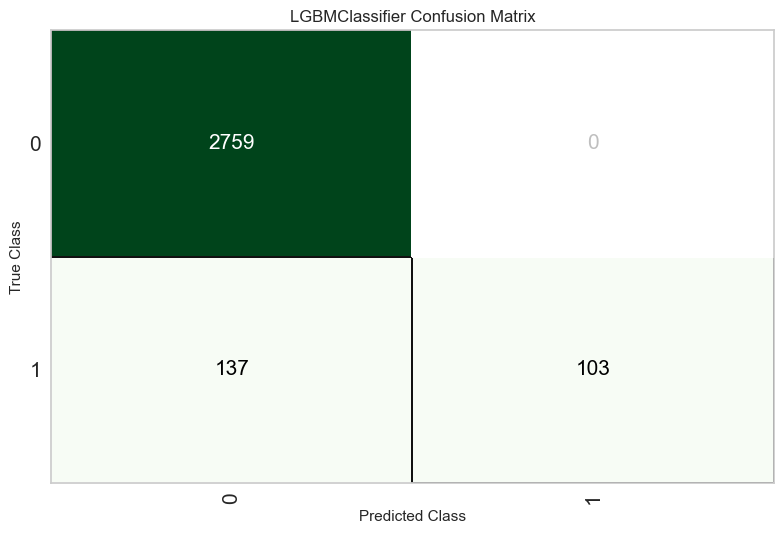

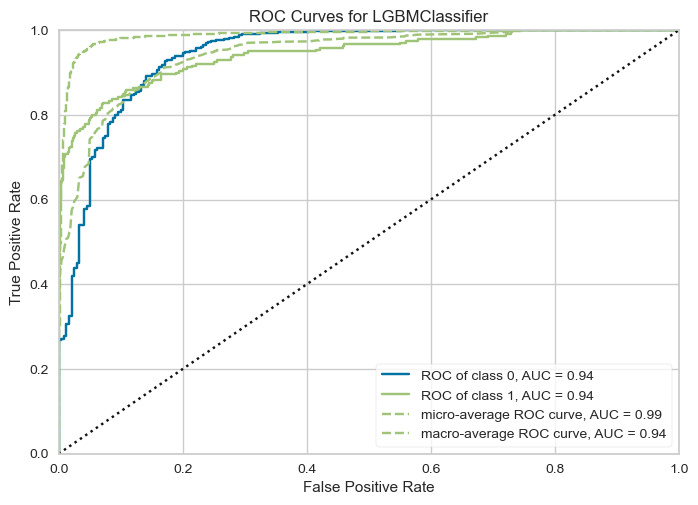

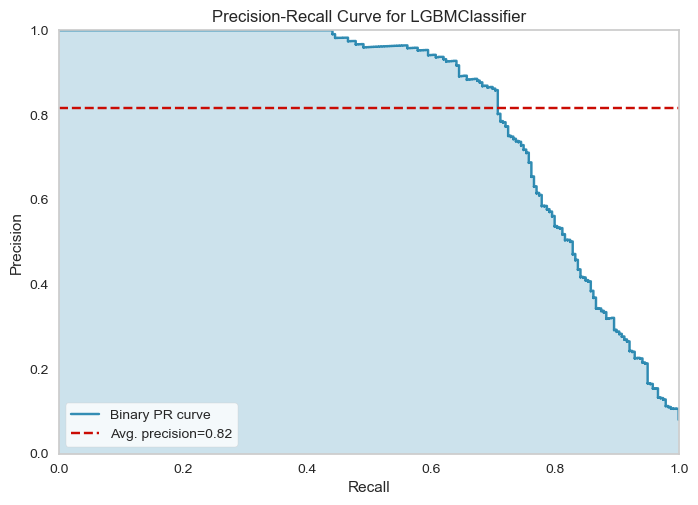

In [37]:
from pycaret.classification import plot_model
import matplotlib.pyplot as plt

# Vẽ confusion matrix
plot_model(loaded_model, plot='confusion_matrix')

# Vẽ ROC Curve
plot_model(loaded_model, plot='auc')

# Vẽ Precision-Recall Curve
plot_model(loaded_model, plot='pr')



In [38]:
from pycaret.classification import plot_model

# Vẽ và lưu confusion matrix
plot_model(loaded_model, plot='confusion_matrix', save=True)

# Vẽ và lưu ROC Curve
plot_model(loaded_model, plot='auc', save=True)

# Vẽ và lưu Precision-Recall Curve
plot_model(loaded_model, plot='pr', save=True)


'Precision Recall.png'

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tải dữ liệu từ tệp CSV
file_path = r'D:\NTU\DA_BO\BaiTap_Lon\Retail_Supply_Chain_Sales_Analysis\model_results.csv'
data = pd.read_csv(file_path)

# Hiển thị thông tin tổng quan về DataFrame
print(data1.info())

# Hiển thị một số hàng đầu của DataFrame để xem dữ liệu thô
print(data1.head())

# Kiểm tra có giá trị nào không phải số trong các cột dữ liệu không
for column in data1.columns[1:]:
    if not pd.api.types.is_numeric_dtype(data1[column]):
        print(f"Column {column} contains non-numeric data.")
        print(data1[column].unique())  # Hiển thị các giá trị duy nhất trong cột để tìm vấn đề


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fold      12 non-null     object 
 1   Accuracy  12 non-null     float64
 2   AUC       12 non-null     float64
 3   Recall    12 non-null     float64
 4   Prec.     12 non-null     float64
 5   F1        12 non-null     float64
 6   Kappa     12 non-null     float64
 7   MCC       12 non-null     float64
dtypes: float64(7), object(1)
memory usage: 900.0+ bytes
None
  Fold  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0    0    0.9286  0.8988  0.2857  0.6154  0.3902  0.3577  0.3876
1    1    0.9286  0.8566  0.2500  0.6364  0.3590  0.3287  0.3694
2    2    0.9200  0.8027  0.1964  0.5000  0.2821  0.2481  0.2789
3    3    0.9229  0.8010  0.2143  0.5455  0.3077  0.2750  0.3091
4    4    0.9300  0.8488  0.2679  0.6522  0.3797  0.3494  0.3887


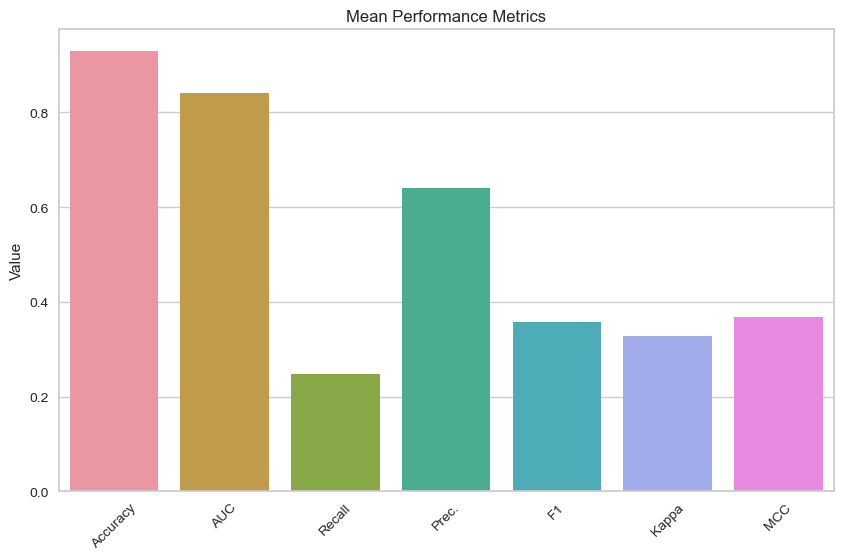

NameError: name 'squarify' is not defined

<Figure size 1200x800 with 0 Axes>

In [49]:
# Tính giá trị trung bình cho mỗi cột
mean_values = data1.mean().drop('Fold')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title('Mean Performance Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



In [47]:
pip install squarify


  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


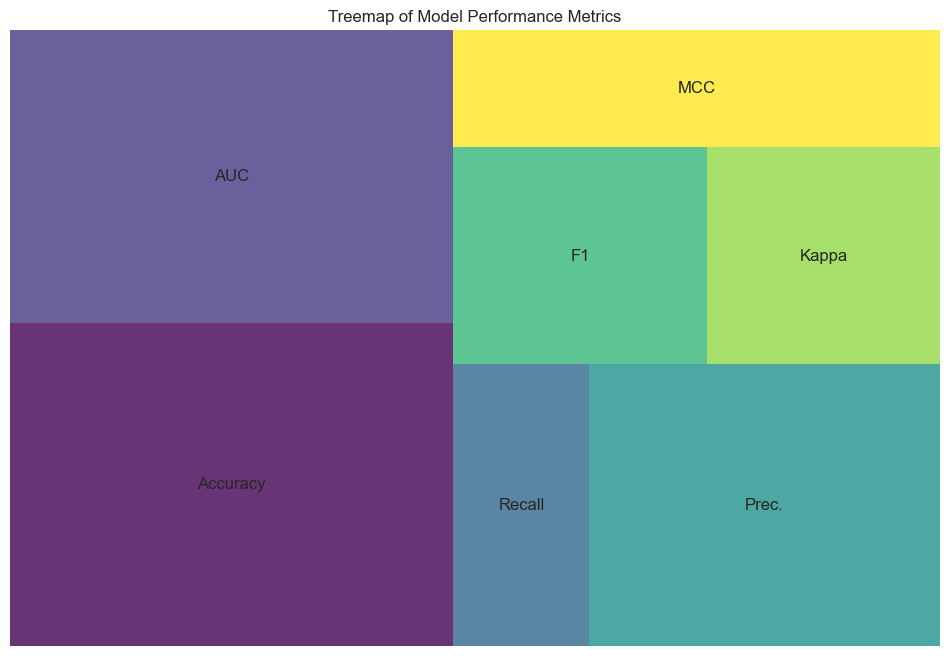

In [50]:
import squarify
# Màu sắc cho mỗi hình chữ nhật trong treemap
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_values)))

# Tạo treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=mean_values, label=mean_values.index, alpha=.8, color=colors)
plt.axis('off')  # Tắt các trục
plt.title('Treemap of Model Performance Metrics')
plt.show()


# Mục tiêu của mô hình này là dự đoán xem một sản phẩm có được hoàn trả hay không (hoàn trả hàng).

In [15]:

# Tạo dữ liệu giả lập (test_data) để minh họa
test_data = pd.DataFrame({
    'Order Date': ['2019-01-10', '2019-03-14', '2019-05-20'],
    'Ship Date': ['2019-01-13', '2019-03-17', '2019-05-23'],
    'Ship Mode': ['Second Class', 'First Class', 'Standard Class'],
    'Segment': ['Consumer', 'Corporate', 'Home Office'],
    'Country': ['United States', 'United States', 'United States'],
    'City': ['Los Angeles', 'New York', 'San Francisco'],
    'State': ['CA', 'NY', 'CA'],
    'Region': ['West', 'East', 'West'],
    'Retail Sales People': ['Person A', 'Person B', 'Person C'],
    'Category': ['Furniture', 'Technology', 'Office Supplies'],
    'Sub-Category': ['Bookcases', 'Phones', 'Binders'],
    'Sales': [261.96, 731.94, 14.62],
    'Quantity': [2, 3, 2],
    'Discount': [0.0, 0.0, 0.0],
    'Profit': [41.91, 219.58, 6.87]
})

# Chuyển đổi cột ngày tháng sang định dạng datetime
test_data['Order Date'] = pd.to_datetime(test_data['Order Date'])
test_data['Ship Date'] = pd.to_datetime(test_data['Ship Date'])

# Dự đoán trên tập dữ liệu kiểm thử
predictions = predict_model(loaded_model, data=test_data)

# Hiển thị kết quả dự đoán chi tiết
# print(predictions)
predictions

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Retail Sales People,Category,Sub-Category,Sales,Quantity,Discount,Profit,prediction_label,prediction_score
0,2019-01-10,2019-01-13,Second Class,Consumer,United States,Los Angeles,CA,West,Person A,Furniture,Bookcases,261.959991,2,0.0,41.910000,0,0.9482
1,2019-03-14,2019-03-17,First Class,Corporate,United States,New York,NY,East,Person B,Technology,Phones,731.940002,3,0.0,219.580002,0,0.9301
2,2019-05-20,2019-05-23,Standard Class,Home Office,United States,San Francisco,CA,West,Person C,Office Supplies,Binders,14.620000,2,0.0,6.870000,0,0.9441


In [18]:
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')
